# YAIA Summarizer
### (_Yet Another Intelligent Assistant_) 

In [1]:
import numpy as np
import pandas as pd

#### Installing xmltodict library to parse xml data

In [3]:
#!pip install xmltodict

In [2]:
import xmltodict

#### Importing the BC3 corpus

In [3]:
# raw corpus
with open('Resources/bc3/corpus.xml') as fd:
    corpus = xmltodict.parse(fd.read())
    
# annotated corpus
with open("Resources/bc3/annotation.xml") as fd:
    annotatedCorpus = xmltodict.parse(fd.read())

## The BC3 Corpus
### _The raw corpus_

#### Exploring tasks and data processing

In [4]:
len(corpus["root"]["thread"])

40

** Tasks **
   - defining the base dataframe
        - columns names: thread_num, id, threadName, received, from, to, subject, sentence_id, sentence_content

In [5]:
corpusDF = pd.DataFrame(columns=["thread_num", "id", "name", "received", "from", "to", "subject", "sentence_id", "sentence_content"])

In [6]:
for idx, val in enumerate(corpus["root"]["thread"]):
#     print(idx) # number of thread
#     print(val["listno"]) # ide number
#     print(val["name"]) # name of the thread
    for doc in val["DOC"]:
#         print(doc["Received"]) # date of mail
#         print(doc["From"]) # who sends the email
#         print(doc["To"]) # to whom the mail is
#         print(doc["Subject"]) # the subject of the mail
        if isinstance(doc["Text"]["Sent"], list) == False:
#             print(doc["Text"]["Sent"]["@id"])
#             print(doc["Text"]["Sent"]["#text"])
            corpusDF = corpusDF.append({
                "thread_num": idx, 
                "id": val["listno"], 
                "name":val["name"],
                "received": doc["Received"], 
                "from": doc["From"], 
                "to": doc["To"], 
                "subject": doc["Subject"], 
                "sentence_id": doc["Text"]["Sent"]["@id"], 
                "sentence_content": doc["Text"]["Sent"]["#text"]
            }, ignore_index=True)
        else:
            for text in doc["Text"]["Sent"]:
#                 print(text["@id"]) # the sentence_id
#                 print(text["#text"]) # the sentence_content
                corpusDF = corpusDF.append({
                    "thread_num": idx, 
                    "id": val["listno"], 
                    "name":val["name"],
                    "received": doc["Received"], 
                    "from": doc["From"], 
                    "to": doc["To"], 
                    "subject": doc["Subject"], 
                    "sentence_id": text["@id"], 
                    "sentence_content": text["#text"]
                }, ignore_index=True)


In [7]:
corpusDF["id"].unique()

array(['007-7484738', '015-2625401', '023-2964247', '026-4380722',
       '043-10248963', '053-15491914', '053-15927827', '058-13714734',
       '059-11070771', '059-15393869', '059-7186494', '059-9045120',
       '060-0021651', '060-4302525', '061-10140940', '063-1009111',
       '066-15270802', '067-1027069', '067-11978590', '068-16207900',
       '070-4154814', '071-10334272', '074-0998972', '074-14150913',
       '074-2313297', '074-6324762', '075-15948761', '075-16233750',
       '076-4622322', '077-4500595', '078-1321398', '078-15693133',
       '078-3797219', '078-6832141', '078-8112187', '079-14194071',
       '079-4736087', '080-5970135', '094-2808305', '107-16164699'],
      dtype=object)

In [8]:
corpusDF.shape

(3222, 9)

In [9]:
corpusDF.loc[corpusDF["thread_num"]==0,:].head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content
0,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr..."
1,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...
2,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and..."
3,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...
4,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...


### _The annotated corpus_

** Tasks **
   - defining the base dataframe
        - columns names: thread_num, id, threadName, annotator_id, annotation_date, important_sentence_id

In [10]:
annotatedDF = pd.DataFrame(columns=["thread_num", "id", "thread_name", "annotator_id", "annotation_date", "important_sentence_id"])

In [11]:
for idx, val in enumerate(annotatedCorpus["root"]["thread"]):
#     print(idx) # number of thread
#     print(val["listno"]) # ide number
#     print(val["name"]) # name of the thread
    for annotation in val["annotation"]:
#         print(annotation["desc"]) # annotator id
#         print(annotation["date"]) # date of annotation
        for sent in annotation["sentences"]["sent"]:
#             print(sent["@id"]) # the important_sentence_id
            annotatedDF = annotatedDF.append({
                "thread_num": idx, 
                "id": val["listno"], 
                "thread_name":val["name"],
                "annotator_id": annotation["desc"], 
                "annotation_date": annotation["date"], 
                "important_sentence_id": sent["@id"]
            }, ignore_index=True)

In [12]:
annotatedDF.head()

,thread_num,id,thread_name,annotator_id,annotation_date,important_sentence_id
0,0,067-11978590,AU WG joining us for an afternoon at F2F in Br...,Annotator7-Part2,Fri May 23 14:01:53 -0700 2008,1.1
1,0,067-11978590,AU WG joining us for an afternoon at F2F in Br...,Annotator7-Part2,Fri May 23 14:01:53 -0700 2008,1.2
2,0,067-11978590,AU WG joining us for an afternoon at F2F in Br...,Annotator7-Part2,Fri May 23 14:01:53 -0700 2008,1.3
3,0,067-11978590,AU WG joining us for an afternoon at F2F in Br...,Annotator7-Part2,Fri May 23 14:01:53 -0700 2008,1.4
4,0,067-11978590,AU WG joining us for an afternoon at F2F in Br...,Annotator7-Part2,Fri May 23 14:01:53 -0700 2008,2.4


In [13]:
annotatedDF.shape

(1689, 6)

In [14]:
annotatedDF.loc[annotatedDF["thread_num"]==2,:].head()

,thread_num,id,thread_name,annotator_id,annotation_date,important_sentence_id
97,2,080-5970135,legal case Ryan air,Annotator10-Part2,Wed Jun 04 13:47:44 -0700 2008,1.1
98,2,080-5970135,legal case Ryan air,Annotator10-Part2,Wed Jun 04 13:47:44 -0700 2008,2.5
99,2,080-5970135,legal case Ryan air,Annotator10-Part2,Wed Jun 04 13:47:44 -0700 2008,3.2
100,2,080-5970135,legal case Ryan air,Annotator10-Part2,Wed Jun 04 13:47:44 -0700 2008,5.1
101,2,080-5970135,legal case Ryan air,Annotator10-Part2,Wed Jun 04 13:47:44 -0700 2008,8.2


#### Getting the sentence score according annotators

   - There are 3 annotators per mail
   - Threshold = 2 (if 2 or more than 2 annotators scored a sentence as important)

In [15]:
annotatedScores = annotatedDF.groupby(['id', 'important_sentence_id']).size().reset_index(name="score").iloc[:,[0,1,2]].query("score >= 2")

In [16]:
annotatedScores.head()

,id,important_sentence_id,score
0,007-7484738,1.1,2
1,007-7484738,1.2,3
2,007-7484738,1.3,2
3,007-7484738,1.4,2
4,007-7484738,1.5,2


In [17]:
annotatedScores.shape

(555, 3)

In [18]:
annotatedScores.rename(columns={"important_sentence_id": "sentence_id"}, inplace=True)

In [19]:
annotatedScores.head()

,id,sentence_id,score
0,007-7484738,1.1,2
1,007-7484738,1.2,3
2,007-7484738,1.3,2
3,007-7484738,1.4,2
4,007-7484738,1.5,2


In [20]:
corpusDF.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content
0,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr..."
1,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...
2,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and..."
3,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...
4,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...


In [21]:
scoredCorpus = pd.merge(corpusDF, annotatedScores, how="left", on=['id', 'sentence_id'])

In [22]:
scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score
0,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",2.0
1,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,3.0
2,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",2.0
3,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,2.0
4,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,2.0


In [23]:
scoredCorpus.shape

(3222, 10)

In [24]:
scoredCorpus.loc[scoredCorpus["thread_num"]==0,:].head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score
0,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",2.0
1,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,3.0
2,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",2.0
3,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,2.0
4,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,2.0


In [25]:
# scoredCorpus["score"].fillna(0, inplace=True)
# scoredCorpus.loc[scoredCorpus["score"]>0, "score"] = 1
scoredCorpus.loc[scoredCorpus["score"]>0, "score"] = "Important"
scoredCorpus["score"].fillna("No important", inplace=True)


In [26]:
scoredCorpus.shape

(3222, 10)

** Adding the text sentence / email features **
   - sentence_position. _The position of the sentence in the thread_
   - words_in_sentence. _The number of words in the sentence_
   - is_question. _Does the sentence has a question mark?_
   - position_mail. _The position of the mail in the thread_
   - is_money. _Does the sentence has numbers?_
   - is_date. _Does the sentence has a date?_
   - is_in_title. _Does a word sentence appears in the thread title?
   - tf_idf_score. _The sentence score in the mail_
   - tf_idf_total_score. _The sentence score in the thread_

In [27]:
# ******* sentence_position ********

# converting received date to datetime
scoredCorpus["received"] =  pd.to_datetime(scoredCorpus["received"])

In [28]:
# ordering the dataframe by thread and date 
scoredCorpus.sort_values(by=['thread_num', 'received'], ascending=[True, True], inplace=True)

In [29]:
sentencePosition = []
threads = scoredCorpus.loc[:,["thread_num"]].drop_duplicates().reset_index(drop=True)

# getting sentence position
for thread in threads["thread_num"]:
    sentenceNumber = len(scoredCorpus.loc[scoredCorpus["thread_num"]==thread]) +1
    positions = np.arange(1,sentenceNumber, 1).tolist()
    sentencePosition.extend(positions)

In [30]:
sp = pd.DataFrame(sentencePosition)

In [31]:
sp.rename(columns={0:"sentence_position"}, inplace=True)
scoredCorpus = pd.concat([scoredCorpus, sp], axis=1)

scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5


In [32]:
# ******* words_in_sentence ********

#  ------ ToDo remove stop words to reduce noise, also remove weird symbols ----------
from nltk.tokenize import word_tokenize

# tokenizing and counting words per sentence
words_in_sentence = []
for sentence in scoredCorpus["sentence_content"]:
    tokens = len(word_tokenize(sentence))
    words_in_sentence.append(tokens)

In [33]:
wis = pd.DataFrame(words_in_sentence)

In [34]:
wis.rename(columns={0:"words_in_sentence"}, inplace=True)
scoredCorpus = pd.concat([scoredCorpus, wis], axis=1)

scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51


In [35]:
# ******* is_question ********

# ToDo: Change this pleaseee
# not fancy but works
is_question = []
for sentence in scoredCorpus["sentence_content"]:
    if sentence.find("?") != -1:
        is_question.append(1)
    else:
        is_question.append(0)

In [36]:
iq = pd.DataFrame(is_question)

In [37]:
iq.rename(columns={0:"is_question"}, inplace=True)
scoredCorpus = pd.concat([scoredCorpus, iq], axis=1)

scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15,0
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29,0
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18,0
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23,0
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51,0


In [38]:
# ******* position_mail ********

threadMails = scoredCorpus.loc[:,["thread_num", "id", "received"]].drop_duplicates().reset_index(drop=True)
threadMails.head(10)

,thread_num,id,received
0,0,007-7484738,1998-12-08 15:30:52
1,0,007-7484738,1998-12-10 04:21:11
2,0,007-7484738,1998-12-10 15:09:32
3,0,007-7484738,1998-12-10 19:55:56
4,0,007-7484738,1998-12-12 00:02:06
5,1,015-2625401,2003-04-25 13:39:28
6,1,015-2625401,2003-04-25 14:12:54
7,1,015-2625401,2003-04-25 14:22:24
8,1,015-2625401,2003-04-25 14:36:41
9,1,015-2625401,2003-04-25 17:32:27


In [39]:
threadMails["position_mail"] = threadMails.groupby(["thread_num", "id"]).cumcount()+1

In [40]:
threadMails.head(10)

,thread_num,id,received,position_mail
0,0,007-7484738,1998-12-08 15:30:52,1
1,0,007-7484738,1998-12-10 04:21:11,2
2,0,007-7484738,1998-12-10 15:09:32,3
3,0,007-7484738,1998-12-10 19:55:56,4
4,0,007-7484738,1998-12-12 00:02:06,5
5,1,015-2625401,2003-04-25 13:39:28,1
6,1,015-2625401,2003-04-25 14:12:54,2
7,1,015-2625401,2003-04-25 14:22:24,3
8,1,015-2625401,2003-04-25 14:36:41,4
9,1,015-2625401,2003-04-25 17:32:27,5


In [41]:
scoredCorpus["position_mail"] = 0

In [42]:
# ToDo: Simplify this assignment, include the received date as condition in the query

for mailDate in threadMails["received"]:
    position = threadMails.loc[threadMails["received"] == mailDate, "position_mail"].values[0]
    scoredCorpus.loc[scoredCorpus['received'] == mailDate, "position_mail"] = position
    

In [43]:
scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15,0,1
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29,0,1
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18,0,1
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23,0,1
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51,0,1


In [44]:
# ******* is_money ********

import re

# regex to evaluate if the word is a number or an amount
pattern = "^\$?(?=\(.*\)|[^()]*$)\(?\d{1,3}(,?\d{3})?(\.\d\d?)?\)?$"

is_money = []
for sentence in scoredCorpus["sentence_content"]:
    words = sentence.split(" ")
    for w in words:
        result = re.match(pattern, w)
        if result:
            is_money.append(1)
            break
    else:
        is_money.append(0)


In [45]:
im = pd.DataFrame(is_money, columns=["is_money"])
scoredCorpus = pd.concat([scoredCorpus, im], axis=1)

scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15,0,1,0
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29,0,1,0
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18,0,1,0
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23,0,1,0
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51,0,1,0


In [46]:
# ******* is_date ********

# regex to evaluate if the word is a date: mm/dd/yy, mm/dd/yyyy, dd/mm/yy, and dd/mm/yyyy
pattern = "^(?:(1[0-2]|0?[1-9])/(3[01]|[12][0-9]|0?[1-9])|(3[01]|[12][0-9]|0?[1-9])/(1[0-2]|0?[1-9]))/(?:[0-9]{2})?[0-9]{2}$"
# months of the year
months = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"\
         "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
# weekdays
days = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday", "mon", "tue", "wed", "thu", "fri", "sat", "sun"]

is_date = []
for sentence in scoredCorpus["sentence_content"]:
    words = sentence.split(" ")
    for w in words:
        resPattern = re.match(pattern, w)
        resMonth   = np.isin(w.lower(), months)
        resWeekday = np.isin(w.lower(), days)
        
        if resPattern or resMonth or resWeekday:
            is_date.append(1)
            break         
    else:
        is_date.append(0)
        

In [47]:
len(is_date)

3222

In [48]:
idate = pd.DataFrame(is_date, columns=['is_date'])
scoredCorpus = pd.concat([scoredCorpus, idate], axis=1)

scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15,0,1,0,0
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29,0,1,0,0
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18,0,1,0,0
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23,0,1,0,0
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51,0,1,0,1


In [49]:
# ******* is_in_title ********

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
stop_words = set(stopwords.words('english'))

is_in_title = []
for index, row in scoredCorpus.iterrows():
    subjectTokens = word_tokenize(row["subject"].lower())
    filteredSubject = [w for w in subjectTokens if not w in stop_words]
    sentenceTokens = word_tokenize(row["sentence_content"].lower())
    filteredSentence = [w for w in sentenceTokens if not w in stop_words]
    
    result = np.isin(filteredSentence, filteredSubject)
    fResult = np.isin(True, result)
    
    if fResult:
        is_in_title.append(1)
    else:
        is_in_title.append(0)

In [50]:
len(is_in_title)

3222

In [51]:
it = pd.DataFrame(is_in_title, columns=['is_in_title'])
scoredCorpus = pd.concat([scoredCorpus, it], axis=1)

scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15,0,1,0,0,1
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29,0,1,0,0,1
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18,0,1,0,0,1
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23,0,1,0,0,1
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51,0,1,0,1,0


### Splitting data to calculate the TFIDF scores

In [52]:
# 80% of the scored corpus for train (32 from 40 emails)
train = scoredCorpus.query("thread_num <= 31")
print(train.shape)

# 20% of the scored corpus for test (8 from 40 emails)

test = scoredCorpus.query("thread_num > 31")
print(test.shape)

(2605, 17)
(617, 17)


In [53]:
import sklearn

# Function to calculate the TF-IDF

def scoreSentences(sentences):
    scores = []

    # define the vectorizer function
    vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(
        max_features=1024, stop_words='english')
    # encode sentences
    # output (sentence number, word index in vocabulary)
    # and word score in the whole vocabulary
    X = vectorizer.fit_transform(sentences)

    # NEXT --- scoring the sentence: 
    # according the score, decide whether include it in the
    # final summary or not

    # ----------- Approaches ------------ #
    # formula 1: 
    # sentence score = total terms values in the sentence
    # / total of terms in the sentence

    # formula 2: 
    # sentence score = total terms values in the sentence
    # / total of words in the sentence
    
    # formula 3: 
    # sentence score = total terms values in the sentence
    
    # formula 4: 
    # sentence score = total terms values in the sentence
    # / total of terms in the text


    for idx, v in enumerate(X):
        # print("Sentence number: ", idx)
        # print(v)

        totalTermSentenceValue = v.sum(axis=None)
        # print("Total sentence term value: ", totalTermSentenceValue)
        termSentenceLength = v.getnnz()
        # print("Number terms in the sentence: ", termSentenceLength)

        # formula 1:
        # sentenceScore = totalTermSentenceValue / termSentenceLength

        #formula 2:
        # numWordsPerSentence = len(sentences[idx])
        # sentenceScore = totalTermSentenceValue / numWordsPerSentence

        # formula 3:
        # sentenceScore = totalTermSentenceValue

        # formula 4:
        sentenceScore = totalTermSentenceValue / X.sum(axis=None)

        # print("Sentence score: ", sentenceScore)
        # print("\n")

        scores.append((idx, round(sentenceScore,2)))

    return scores


In [54]:
# calculates the tf-idf sentence score
def tfidf(data, typeScore):
    
    if typeScore == "mailScore":
        threadMails = data.loc[:,["thread_num", "id", "received"]].drop_duplicates().reset_index(drop=True)
    elif typeScore == "threadScore":
        threadMails = data.loc[:,["thread_num"]].drop_duplicates().reset_index(drop=True)

    tf_idf_score = []
    for index, row in threadMails.iterrows():
        
        if typeScore == "mailScore":
            s = data.loc[(data["received"]==row["received"]) & (data["thread_num"]==row["thread_num"])].iloc[:,[8]]
        elif typeScore == "threadScore":
            s = data.loc[(data["thread_num"]==row["thread_num"])].iloc[:,[8]]

        sentences = s["sentence_content"].tolist()
        normalizedSentences = [s.lower() for s in sentences]
        scoredSentences = scoreSentences(normalizedSentences)
        _,score = zip(*scoredSentences)
        tf_idf_score.extend(score)
    
    return tf_idf_score
    

#### TF-IDF in training data

In [55]:
# ******* tf_idf_total_score ********

tf_idf_score = tfidf(train, "mailScore")
len(tf_idf_score)

/home/twarrior/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


2605

In [56]:
tfScore = pd.DataFrame(tf_idf_score, columns=['tf_idf_score'])
train = pd.concat([train, tfScore], axis=1)
train.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title,tf_idf_score
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15,0,1,0,0,1,0.14
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29,0,1,0,0,1,0.16
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18,0,1,0,0,1,0.10
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23,0,1,0,0,1,0.15
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51,0,1,0,1,0,0.15


In [57]:
# ******* tf_idf_total_score ********

tf_idf_total_score = tfidf(train, "threadScore")
len(tf_idf_total_score)

/home/twarrior/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


2605

In [58]:
tfTotalScore = pd.DataFrame(tf_idf_total_score, columns=['tf_idf_total_score'])
train = pd.concat([train, tfTotalScore], axis=1)
train.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title,tf_idf_score,tf_idf_total_score
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15,0,1,0,0,1,0.14,0.03
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29,0,1,0,0,1,0.16,0.03
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18,0,1,0,0,1,0.10,0.02
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23,0,1,0,0,1,0.15,0.03
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51,0,1,0,1,0,0.15,0.03


#### TF-IDF in testing data

In [59]:
test.reset_index(drop=True, inplace=True)
test.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title
0,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.1,"Dear All,",No important,1,3,0,1,0,0,0
1,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.2,I found this interesting Website accessibility...,Important,2,12,0,1,0,0,1
2,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.3,Apologies now in case this page is not accessible,No important,3,9,0,1,0,0,0
3,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.4,- it's just that the results are very interest...,Important,4,36,0,1,0,0,1
4,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.5,Kind regards,No important,5,2,0,1,0,0,0


In [60]:
# ******* tf_idf_score ********

tf_idf_score = tfidf(test, "mailScore")
len(tf_idf_score)

/home/twarrior/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


617

In [61]:
tfScore = pd.DataFrame(tf_idf_score, columns=['tf_idf_score'])
test = pd.concat([test, tfScore], axis=1)
test.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title,tf_idf_score
0,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.1,"Dear All,",No important,1,3,0,1,0,0,0,0.03
1,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.2,I found this interesting Website accessibility...,Important,2,12,0,1,0,0,1,0.08
2,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.3,Apologies now in case this page is not accessible,No important,3,9,0,1,0,0,0,0.05
3,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.4,- it's just that the results are very interest...,Important,4,36,0,1,0,0,1,0.08
4,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.5,Kind regards,No important,5,2,0,1,0,0,0,0.04


In [62]:
# ******* tf_idf_total_score ********

tf_idf_total_score = tfidf(test, "threadScore")
len(tf_idf_total_score)

/home/twarrior/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


617

In [63]:
tfTotalScore = pd.DataFrame(tf_idf_total_score, columns=['tf_idf_total_score'])
test = pd.concat([test, tfTotalScore], axis=1)
test.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title,tf_idf_score,tf_idf_total_score
0,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.1,"Dear All,",No important,1,3,0,1,0,0,0,0.03,0.01
1,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.2,I found this interesting Website accessibility...,Important,2,12,0,1,0,0,1,0.08,0.02
2,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.3,Apologies now in case this page is not accessible,No important,3,9,0,1,0,0,0,0.05,0.01
3,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.4,- it's just that the results are very interest...,Important,4,36,0,1,0,0,1,0.08,0.02
4,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.5,Kind regards,No important,5,2,0,1,0,0,0,0.04,0.01


##### Selecting columns and encoding categorical values

In [64]:
# Base columns: thread_num, sentence_id, score, sentence_position, words_in_sentence, is_question, position_mail, is_money, is_date,
#               is_in_title, tf_idf_score, tf_idf_total_score

dfTrain = train.drop(["id","name","received","from","to","subject", "sentence_content"], axis=1)
dfTest = test.drop(["id","name","received","from","to","subject", "sentence_content"], axis=1)


In [65]:
dfTrain.head()

,thread_num,sentence_id,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title,tf_idf_score,tf_idf_total_score
0,0,1.1,Important,1,15,0,1,0,0,1,0.14,0.03
1,0,1.2,Important,2,29,0,1,0,0,1,0.16,0.03
2,0,1.3,Important,3,18,0,1,0,0,1,0.10,0.02
3,0,1.4,Important,4,23,0,1,0,0,1,0.15,0.03
4,0,1.5,Important,5,51,0,1,0,1,0,0.15,0.03


In [66]:
dfTest.head()

,thread_num,sentence_id,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title,tf_idf_score,tf_idf_total_score
0,32,1.1,No important,1,3,0,1,0,0,0,0.03,0.01
1,32,1.2,Important,2,12,0,1,0,0,1,0.08,0.02
2,32,1.3,No important,3,9,0,1,0,0,0,0.05,0.01
3,32,1.4,Important,4,36,0,1,0,0,1,0.08,0.02
4,32,1.5,No important,5,2,0,1,0,0,0,0.04,0.01


#### Oversampling the training data

   - As the dataset is unbalanced, let's implement SMOTE oversampling to the minority class in the training data *ONLY*

In [67]:
# ****** Checking the unbalanced of the data ******

# total sentences in the train dataset
print(train.shape[0])
# important sentences in the train dataset
print(train.query("score=='Important'").shape[0])
# not important sentences in the train dataset
print(train.query("score=='No important'").shape[0])

2605
439
2166


In [68]:
# Defining the X_train, y_train, X_test and y_test data

X_train = dfTrain.drop("score", axis=1)
y_train = dfTrain["score"][:]
y_train.loc[y_train.values == "Important"] = 1
y_train.loc[y_train.values == "No important"] = 0
print(dfTrain.shape)
print(X_train.shape)
print(y_train.shape)


X_test = dfTest.drop("score", axis=1)
y_test = dfTest["score"][:]
y_test.loc[y_test.values == "Important"] = 1
y_test.loc[y_test.values == "No important"] = 0
print(dfTest.shape)
print(X_test.shape)
print(y_test.shape)

(2605, 12)
(2605, 11)
(2605,)
(617, 12)
(617, 11)
(617,)


#### Implementing the SMOTE oversampling 

In [69]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0 No important", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1 Important", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1

Automatically created module for IPython interactive environment


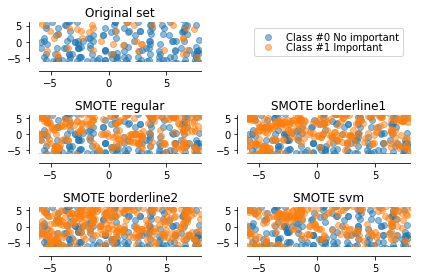

In [70]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X_train)


# Applying SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X_train, y_train)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y_train, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0 No important', 'Class #1 Important'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()

In [71]:
# ****** Checking the new resampled data ******

import collections

# total sentences in the train dataset
print(train.shape[0])
# total sentences in the reesampled dataset [3] corresponds to SMOTE of kind SVM
print(sorted(collections.Counter(y_resampled[3]).items()))


2605
[(0, 2166), (1, 2165)]


In [72]:
X_resampled[3]

array([[ 0.00000000e+00,  1.10000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.40000000e-01,  3.00000000e-02],
       [ 0.00000000e+00,  1.20000000e+00,  2.00000000e+00, ...,
         1.00000000e+00,  1.60000000e-01,  3.00000000e-02],
       [ 0.00000000e+00,  1.30000000e+00,  3.00000000e+00, ...,
         1.00000000e+00,  1.00000000e-01,  2.00000000e-02],
       ...,
       [ 2.05414048e+01,  1.22292976e+00,  2.22929759e+00, ...,
         1.00000000e+00,  1.04968578e-01,  1.77070241e-02],
       [ 2.11463452e+01,  2.82032656e+00,  8.52846021e+00, ...,
        -3.82115053e-01,  4.70730968e-02,  2.00000000e-02],
       [ 1.69498366e+01,  1.08856189e+00, -3.57524504e+00, ...,
         0.00000000e+00,  7.25384393e-01,  1.61872958e-02]])

## The machine learning process

In [100]:
import nltk
import sklearn
import sklearn.multiclass
from sklearn.externals import joblib

path = '../app/ml_models/'

_Checking the testing data_

In [74]:
# important sentences in the test data
print(len(y_test.loc[y_test.values == 1]))
# no important sentences in the test data
print(len(y_test.loc[y_test.values == 0]))

116
501


#### Support Vector Machines

In [87]:
clf = sklearn.multiclass.OneVsRestClassifier(sklearn.svm.LinearSVC())

In [88]:
clf.fit(X_resampled[2], y_resampled[2])

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [89]:
classif_report = sklearn.metrics.classification_report(
    y_test,
    clf.predict(X_test)
)

In [90]:
print("Email classification report")
print(classif_report)

test_acc = sklearn.metrics.accuracy_score(
    y_test,
    clf.predict(X_test)
)

print("Test-data overall accuracy", test_acc)

Email classification report
             precision    recall  f1-score   support

          0       0.86      0.88      0.87       501
          1       0.42      0.38      0.40       116

avg / total       0.78      0.78      0.78       617

Test-data overall accuracy 0.7844408427876823


In [91]:
predClass = clf.predict(X_test)

In [92]:
predClass

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [93]:
test.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title,tf_idf_score,tf_idf_total_score
0,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.1,"Dear All,",No important,1,3,0,1,0,0,0,0.03,0.01
1,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.2,I found this interesting Website accessibility...,Important,2,12,0,1,0,0,1,0.08,0.02
2,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.3,Apologies now in case this page is not accessible,No important,3,9,0,1,0,0,0,0.05,0.01
3,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.4,- it's just that the results are very interest...,Important,4,36,0,1,0,0,1,0.08,0.02
4,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.5,Kind regards,No important,5,2,0,1,0,0,0,0.04,0.01


In [94]:
# Getting the predicted data

def getPredictedSentences(predClass, thread):
    tData = test.copy()
    pred = pd.DataFrame(predClass, columns=['predicted'])
    tData = pd.concat([tData, pred], axis=1)
    
    return tData.loc[(tData["predicted"]==1) & (tData["thread_num"] == thread)].iloc[:,[8]]
    

In [95]:
summary = getPredictedSentences(predClass, 32)
print(summary)

                                     sentence_content
1   I found this interesting Website accessibility...
3   - it's just that the results are very interest...
18  James Kelsey Design Ltd (JKD) or The Incepta G...
22  > I found this interesting Website accessibili...
24  > I found this interesting Website accessibili...
27  Yes, please, an update to the list of the data...
44  > Yes, please, an update to the list of the da...
45  So far, the poll results say that 47% of the p...
48  >> I found this interesting Website accessibil...


In [96]:
# Compute the precision
print(sklearn.metrics.precision_score(y_test, clf.predict(X_test)))

0.41904761904761906


In [97]:
# F1-score
print(sklearn.metrics.f1_score(y_test, clf.predict(X_test)))

0.3981900452488688


In [98]:
# ROC Courve

import matplotlib.pyplot as plt
#from itertools import cycle
from sklearn.metrics import roc_curve, auc

y_score = clf.fit(X_resampled[3], y_resampled[3]).decision_function(X_test)
y_score.shape

(617,)

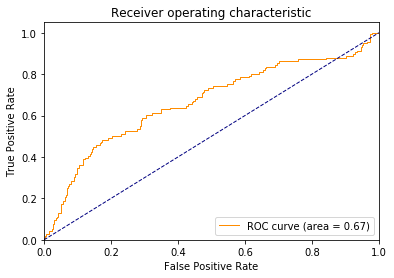

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Saving the model**

In [101]:
filename = 'svm_model.pkl'
joblib.dump(bagging, path+filename)

['../app/ml_models/svm_model.pkl']

#### Decision Trees Classifier

In [102]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier()
clf2.fit(X_resampled[2], y_resampled[2])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [103]:
classif_report = sklearn.metrics.classification_report(
    y_test,
    clf2.predict(X_test),
)

In [104]:
print("Email classification report")
print(classif_report)

test_acc = sklearn.metrics.accuracy_score(
    y_test,
    clf2.predict(X_test)
)

print("Test-data overall accuracy", test_acc)

Email classification report
             precision    recall  f1-score   support

          0       0.84      0.84      0.84       501
          1       0.32      0.33      0.32       116

avg / total       0.75      0.74      0.74       617

Test-data overall accuracy 0.7439222042139384


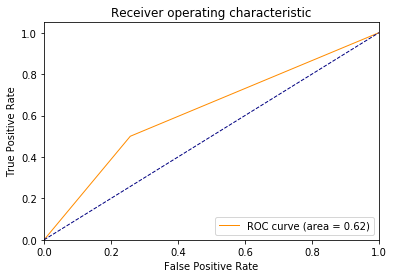

In [105]:
y_score = clf2.fit(X_resampled[3], y_resampled[3]).predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [106]:
# Getting the predicted sentences

predClass = clf2.predict(X_test)
summary = getPredictedSentences(predClass, 32)
print(summary)

                                     sentence_content
1   I found this interesting Website accessibility...
19  JKD run anti virus software on all servers and...
20  JKD advises all recipients to virus scan any f...
22  > I found this interesting Website accessibili...
23                                     Where exactly?
24  > I found this interesting Website accessibili...
27  Yes, please, an update to the list of the data...
32  The poll is halfway down on the right hand sid...
36               Are you viewing in graphics browser?
37                Does anyone need better directions?
44  > Yes, please, an update to the list of the da...
45  So far, the poll results say that 47% of the p...
48  >> I found this interesting Website accessibil...
49                                   > Where exactly?
50  The poll did not display for me either, as you...
51     That's rather ironic considering the question.
54                                  http://tom.me.uk/
56                          

**Saving the model**

In [108]:
filename = 'dt_model.pkl'
joblib.dump(bagging, path+filename)

['../app/ml_models/dt_model.pkl']

#### Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier

clf3 = RandomForestClassifier(n_estimators=10)
clf3.fit(X_resampled[2], y_resampled[2])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [110]:
classif_report = sklearn.metrics.classification_report(
    y_test,
    clf3.predict(X_test)
)

In [111]:
print("Email classification report")
print(classif_report)

test_acc = sklearn.metrics.accuracy_score(
    y_test,
    clf3.predict(X_test)
)

print("Test-data overall accuracy", test_acc)

Email classification report
             precision    recall  f1-score   support

          0       0.84      0.90      0.87       501
          1       0.38      0.26      0.31       116

avg / total       0.75      0.78      0.77       617

Test-data overall accuracy 0.7828200972447326


In [112]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf3, X_resampled[3], y_resampled[3], scoring='precision')
scores.mean() 

0.5323767338260605

In [113]:
# Getting the predicted sentences

predClass = clf3.predict(X_test)
summary = getPredictedSentences(predClass, 32)
print(summary)

                                     sentence_content
1   I found this interesting Website accessibility...
3   - it's just that the results are very interest...
18  James Kelsey Design Ltd (JKD) or The Incepta G...
19  JKD run anti virus software on all servers and...
22  > I found this interesting Website accessibili...
24  > I found this interesting Website accessibili...
27  Yes, please, an update to the list of the data...
50  The poll did not display for me either, as you...
54                                  http://tom.me.uk/
57       Is your Web site accessible to the disabled?
60  2.) No - but it will be within the next 12 mon...
61  3.) No - and I can't see the point of doing so...
62        4.) No - it would be too difficult to do 6%
68                                      > 1.) Yes 22%
69  Wonder how many of those have actually checked...
75                     >> Answers have gotten better.


**Saving the model**

In [114]:
filename = 'rf_model.pkl'
joblib.dump(bagging, path+filename)

['../app/ml_models/rf_model.pkl']

#### Naive Bayes

In [115]:
from sklearn.naive_bayes import GaussianNB

clf4 = GaussianNB()
clf4.fit(X_resampled[3], y_resampled[3])

GaussianNB(priors=None)

In [116]:
classif_report = sklearn.metrics.classification_report(
    y_test,
    clf4.predict(X_test)
)

In [117]:
print("Email classification report")
print(classif_report)

test_acc = sklearn.metrics.accuracy_score(
    y_test,
    clf4.predict(X_test)
)

print("Test-data overall accuracy", test_acc)

Email classification report
             precision    recall  f1-score   support

          0       0.85      0.77      0.81       501
          1       0.29      0.40      0.33       116

avg / total       0.74      0.70      0.72       617

Test-data overall accuracy 0.7034035656401945


In [118]:
gausianScores = cross_val_score(clf4, X_resampled[3], y_resampled[3], scoring='recall')
gausianScores.mean() 

0.5936449452706882

In [119]:
# Getting the predicted sentences

predClass = clf4.predict(X_test)
summary = getPredictedSentences(predClass, 32)
print(summary)

                                     sentence_content
1   I found this interesting Website accessibility...
3   - it's just that the results are very interest...
14                                 Tel: 020 7793 9399
15                                 Fax: 020 7793 9299
18  James Kelsey Design Ltd (JKD) or The Incepta G...
19  JKD run anti virus software on all servers and...
21                                        > Dear All,
22  > I found this interesting Website accessibili...
23                                     Where exactly?
24  > I found this interesting Website accessibili...
27  Yes, please, an update to the list of the data...
44  > Yes, please, an update to the list of the da...
45  So far, the poll results say that 47% of the p...
48  >> I found this interesting Website accessibil...


**Saving the model**

In [120]:
filename = 'gnb_model.pkl'
joblib.dump(bagging, path+filename)

['../app/ml_models/gnb_model.pkl']

#### Bagging Classifier using Decision Trees

In [121]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)
bagging.fit(X_resampled[3], y_resampled[3])

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [122]:
classif_report = sklearn.metrics.classification_report(
    y_test,
    bagging.predict(X_test)
)

In [123]:
print("Email classification report")
print(classif_report)

test_acc = sklearn.metrics.accuracy_score(
    y_test,
    bagging.predict(X_test)
)

print("Test-data overall accuracy", test_acc)

Email classification report
             precision    recall  f1-score   support

          0       0.84      0.93      0.88       501
          1       0.44      0.23      0.30       116

avg / total       0.76      0.80      0.77       617

Test-data overall accuracy 0.7990275526742301


In [124]:
gausianScores = cross_val_score(bagging, X_resampled[3], y_resampled[3], scoring='recall') # score = recall ....  TNR or specificity
gausianScores.mean() 

0.7816084667468365

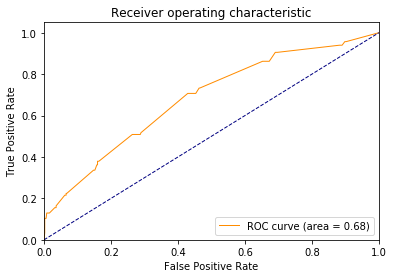

In [125]:
y_score = bagging.fit(X_resampled[3], y_resampled[3]).predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [126]:
# Getting the predicted sentences

predClass = bagging.predict(X_test)
summary = getPredictedSentences(predClass, 32)
print(summary)

                                     sentence_content
1   I found this interesting Website accessibility...
3   - it's just that the results are very interest...
18  James Kelsey Design Ltd (JKD) or The Incepta G...
19  JKD run anti virus software on all servers and...
45  So far, the poll results say that 47% of the p...
48  >> I found this interesting Website accessibil...
50  The poll did not display for me either, as you...
54                                  http://tom.me.uk/
57       Is your Web site accessible to the disabled?
90  And that person is still waiting to hear from ...


**Saving the model**

In [128]:
filename = 'bagging_model.pkl'
joblib.dump(bagging, path+filename)

['../app/ml_models/bagging_model.pkl']

### Implementing Cross Validation to find best hiper parameters

**_This migth tahe a while_**

In [498]:
n_samples, n_features = X_resampled[3].shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X_resampled[3], random_state.randn(n_samples, 200 * n_features)]

In [ ]:
# Classification and ROC analysis
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='poly', probability=True,
                     random_state=random_state, class_weight='balanced')

In [ ]:
from scipy import interp
import time

start_time = time.time()

plt.figure(figsize=(15, 12))
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X_resampled[3], y_resampled[3]):
    probas_ = classifier.fit(X_resampled[3][train], y_resampled[3][train]).predict_proba(X_resampled[3][test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_resampled[3][test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))